In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [622]:
df=pd.read_csv('/content/newdata (5).csv')

# Exploratory Data Analysis

In [623]:
df.head()

,Product category,Product subcategory,Product rating,Transaction number,Transaction date,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity
0,C2,SC2,9.0,975229.0,10/5/2022,265758,928785,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0
1,C2,SC2,1.0,268708.0,15/06/2022,598533,113357,17.97,0.17,1.19,99.0,18.153294,28.955,0.15,18.0
2,C2,SC2,3.0,696757.0,9/4/2022,289082,702163,30.66,0.60,1.69,95.0,30.994194,51.990,0.00,3.0
3,C1,SC2,3.0,144294.0,6/3/2022,912988,672428,18.19,0.68,2.45,37.0,18.511963,33.285,-0.40,5.0
4,C1,SC2,2.0,133559.0,28/04/2022,711463,730238,17.99,1.68,1.34,40.0,17.928834,30.985,-6.40,10.0


In [624]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product category           2400 non-null   object 
 1   Product subcategory        2400 non-null   object 
 2   Product rating             2322 non-null   float64
 3   Transaction number         2322 non-null   float64
 4   Transaction date           2400 non-null   object 
 5   Customer ID                2400 non-null   int64  
 6   Seller ID                  2400 non-null   int64  
 7   Base Price                 2322 non-null   float64
 8   Discounts percentage       2322 non-null   float64
 9   Service charge percentage  2322 non-null   float64
 10  Product ID                 2400 non-null   float64
 11  Total amount per unit      2322 non-null   float64
 12  Product score 1            2322 non-null   float64
 13  Product score 2            2322 non-null   float

In [625]:
df.describe()

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity
count,2322.000000,2322.000000,2400.000000,2400.000000,2322.000000,2322.000000,2322.000000,2400.000000,2322.000000,2322.000000,2322.000000,2376.000000
mean,3.639435,554148.369078,548093.005833,549427.075000,38.198372,0.769286,1.382524,114.253480,38.484908,64.582657,-0.204436,17.064394
std,2.019716,262118.884230,261483.930448,217218.808435,17.204826,0.556488,0.282769,76.530085,17.252917,26.118851,3.416981,12.069747
min,1.000000,100047.000000,101269.000000,113357.000000,15.030000,0.000000,1.000000,10.000000,15.016680,24.635000,-10.800000,1.000000
25%,2.000000,325813.750000,313985.500000,373981.000000,24.400000,0.320000,1.150000,46.000000,24.640672,43.745000,-2.350000,7.000000
50%,3.000000,553141.000000,547263.000000,569028.000000,34.655000,0.670000,1.330000,99.000000,35.108864,59.477500,0.050000,15.000000
75%,5.000000,783866.750000,774773.500000,709568.000000,48.767500,1.130000,1.560000,166.000000,48.987463,80.698750,2.000000,24.000000
max,9.000000,999930.000000,998666.000000,928785.000000,92.580000,2.570000,2.450000,322.000000,92.950968,148.870000,8.950000,80.000000


In [626]:
df.isnull().sum()

Product category              0
Product subcategory           0
Product rating               78
Transaction number           78
Transaction date              0
Customer ID                   0
Seller ID                     0
Base Price                   78
Discounts percentage         78
Service charge percentage    78
Product ID                    0
Total amount per unit        78
Product score 1              78
Product score 2              78
Quantity                     24
dtype: int64

In [627]:
df['Transaction date'] = pd.to_datetime(df['Transaction date'], format='%d/%m/%Y')

In [628]:
num_col = df.select_dtypes(include=['int64', 'float64'])
cat_col = df.select_dtypes(include=['object'])

In [629]:
num_col

,Product rating,Transaction number,Customer ID,Seller ID,Base Price,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Product score 1,Product score 2,Quantity
0,9.0,975229.0,265758,928785,32.11,1.21,1.12,96.0,32.081101,66.165,2.95,8.0
1,1.0,268708.0,598533,113357,17.97,0.17,1.19,99.0,18.153294,28.955,0.15,18.0
2,3.0,696757.0,289082,702163,30.66,0.60,1.69,95.0,30.994194,51.990,0.00,3.0
3,3.0,144294.0,912988,672428,18.19,0.68,2.45,37.0,18.511963,33.285,-0.40,5.0
4,2.0,133559.0,711463,730238,17.99,1.68,1.34,40.0,17.928834,30.985,-6.40,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2395,5.0,500138.0,968630,647438,77.00,0.32,1.15,319.0,77.639100,125.500,3.40,45.0
2396,2.0,643545.0,264324,593860,34.32,1.23,1.45,147.0,34.395504,55.480,-4.15,26.0
2397,1.0,210493.0,791350,642533,18.12,0.56,1.66,18.0,18.319320,29.180,-1.80,6.0
2398,4.0,316244.0,885518,220597,20.96,0.50,1.19,50.0,21.104624,39.440,1.50,12.0


In [630]:
df=df.dropna()

In [631]:
df.shape

(2298, 15)

In [632]:
for col in num_col:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing values in categorical columns with the mode
for col in cat_col:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [633]:
df.isnull().sum()

Product category             0
Product subcategory          0
Product rating               0
Transaction number           0
Transaction date             0
Customer ID                  0
Seller ID                    0
Base Price                   0
Discounts percentage         0
Service charge percentage    0
Product ID                   0
Total amount per unit        0
Product score 1              0
Product score 2              0
Quantity                     0
dtype: int64

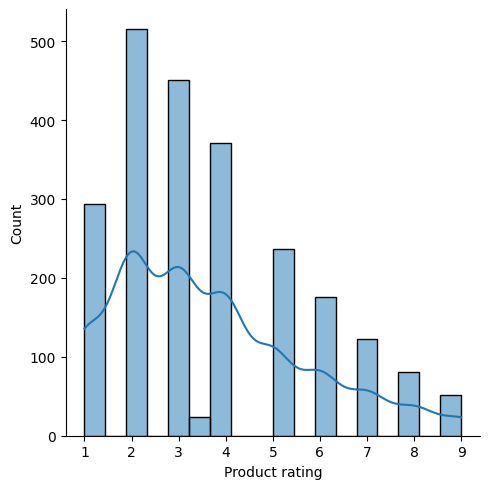

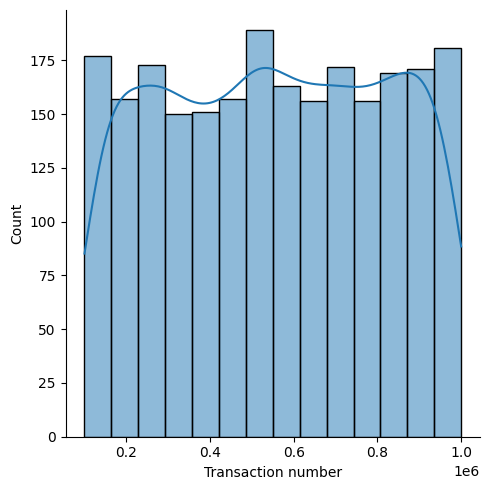

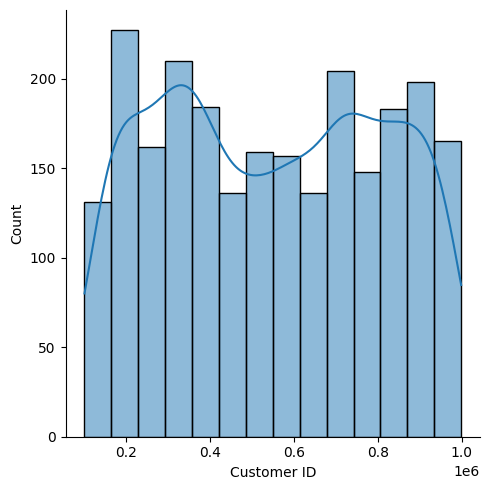

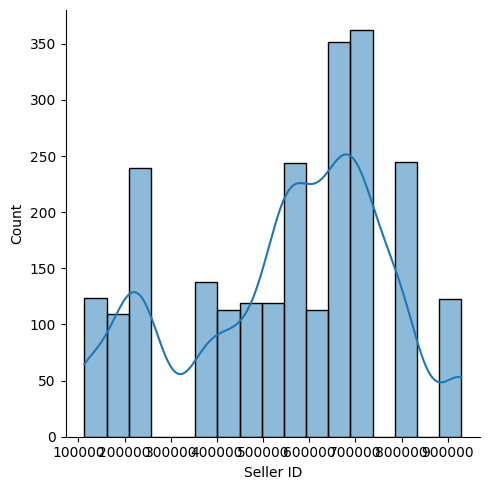

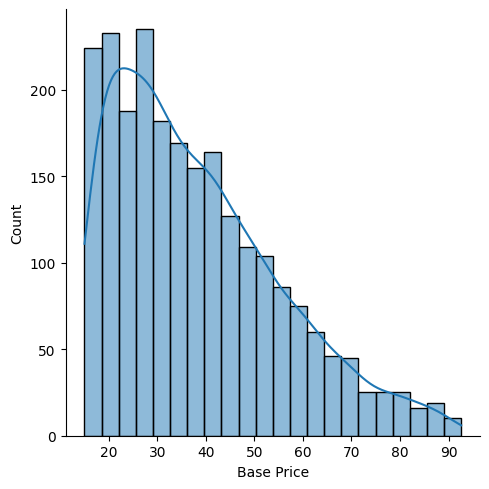

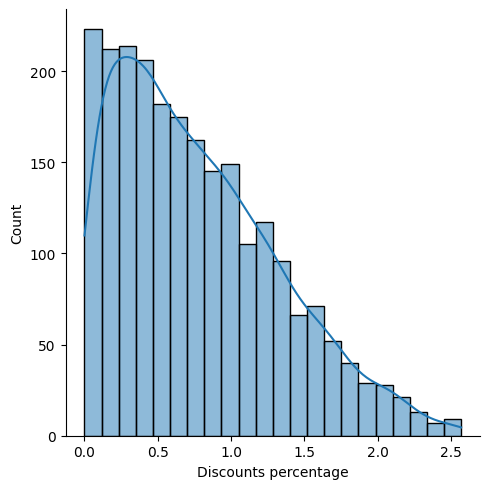

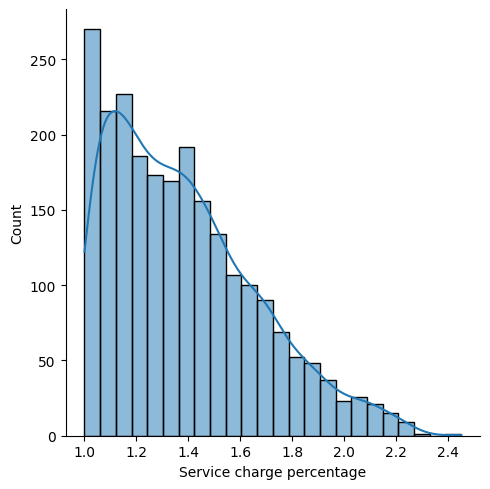

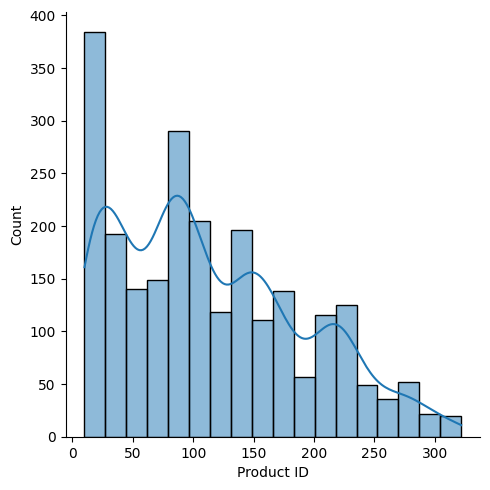

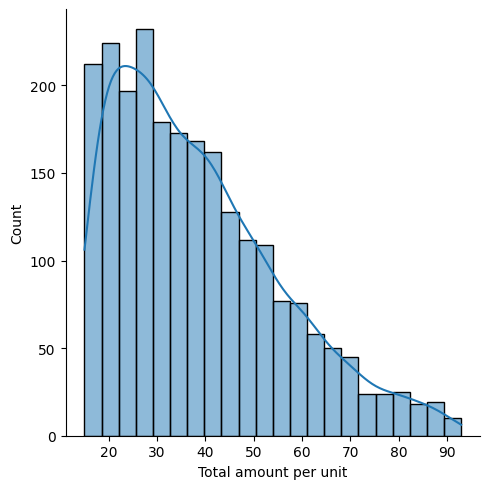

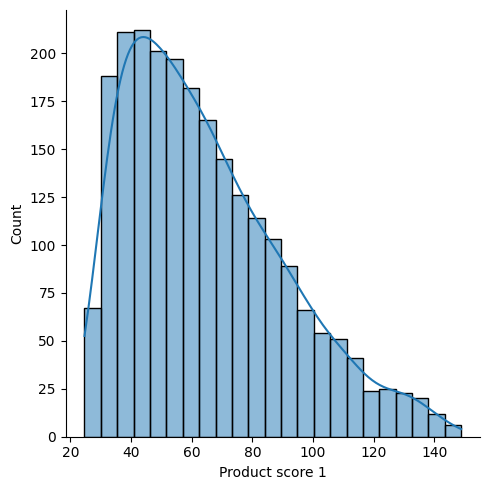

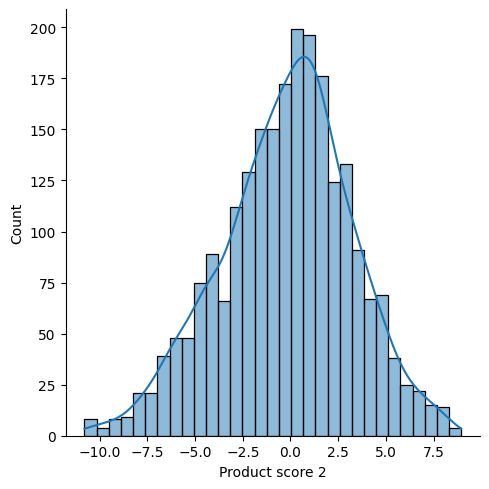

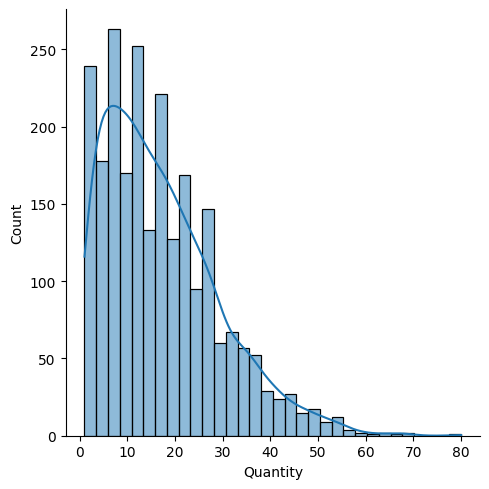

In [634]:
for col in num_col.columns:
  fig=sns.displot(num_col[col],kde=True,label=f'Histogram of {col}')





Contribution of each category in the overall transaction

In [635]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.pie(df, names='Product category')
fig.show()


Contribution of sub-categories in the overall transactions

In [636]:
import plotly.express as px

# Assuming 'df' is your DataFrame
fig = px.pie(df, names='Product subcategory')
fig.show()


Category wise sales distribution

In [637]:
cat_sales=df.groupby('Product category')['Quantity'].sum().sort_values(ascending=False).reset_index()
px.bar(cat_sales,x='Product category',y='Quantity',title='Quantity Sold by Product Category')

Sub-Categories wise sales distribution

In [638]:
subcat_sales=df.groupby('Product subcategory')['Quantity'].sum().sort_values(ascending=False).reset_index()
px.bar(subcat_sales,x='Product subcategory',y='Quantity',title='Quantity Sold by Product Subcategory')

Sale over the period of the six months


<Figure size 1800x600 with 0 Axes>

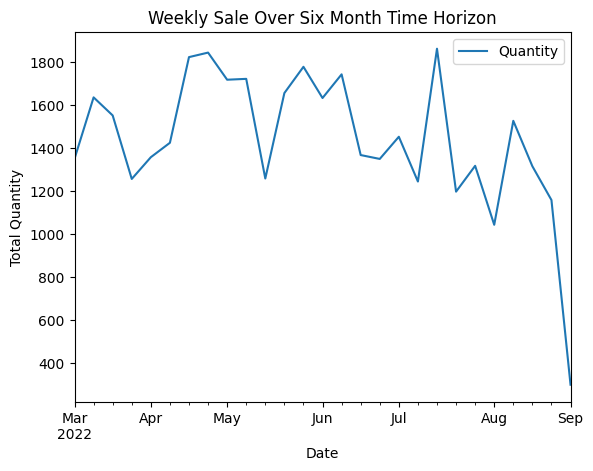

In [641]:
df1 = df.set_index('Transaction date')

# Select the 'Quantity' column
df_ts = df1[['Quantity']]

# Resample the data to a weekly frequency and sum the quantities
df_resample = df_ts.resample('W').sum()

# Plot the resampled data
plt.figure(figsize=(18, 6))
ax = df_resample.plot(title='Weekly Sale Over Six Month Time Horizon')
ax.set_xlabel('Date')
ax.set_ylabel('Total Quantity')
plt.show()

# Feature Engineering

In [532]:
px.imshow(num_col.corr(),color_continuous_scale='viridis',title='Correlation Matrix',aspect='auto',text_auto=True)

In [533]:
num_col=df.select_dtypes(include=['int64','float64'])

In [534]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
vif['Features']=num_col.columns
vif

,VIF,Features
0,342.255710,Product rating
1,4.988732,Transaction number
2,4.924385,Customer ID
3,6.548507,Seller ID
4,48830.717890,Base Price
5,686.747003,Discounts percentage
6,14.192459,Service charge percentage
7,4.258741,Product ID
8,852.608211,Total amount per unit
9,60220.392142,Product score 1


Dropping some features in order to reduce correlation between the features.

In [535]:
df=df.drop(columns=['Base Price','Product score 2','Product score 1'])

In [536]:
num_col=df.select_dtypes(include=['int64','float64'])
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(num_col.values,i) for i in range(num_col.shape[1])]
vif['Features']=num_col.columns
vif

,VIF,Features
0,4.042192,Product rating
1,4.979137,Transaction number
2,4.922040,Customer ID
3,6.540600,Seller ID
4,2.788127,Discounts percentage
5,14.110348,Service charge percentage
6,4.256354,Product ID
7,5.460058,Total amount per unit
8,4.048546,Quantity


In [537]:
px.imshow(num_col.corr(),color_continuous_scale='viridis',title='Correlation Matrix',aspect='auto',text_auto=True)

In [543]:
seller_trans=df.groupby(by='Seller ID')['Transaction number'].nunique().reset_index()
seller_trans

,Seller ID,Transaction number
0,113357,120
1,194273,104
2,220597,106
3,255774,123
4,373981,135
5,435856,109
6,495456,116
7,539784,115
8,554631,119
9,569028,114


In [544]:
df = df.merge(seller_trans, on='Seller ID', how='left')
# df.drop(columns=['Transaction number_y'], inplace=True)  # Uncomment this line if you want to drop a specific column
df.rename(columns={'Transaction number_x': 'Transaction ID', 'Transaction number_y': 'Transaction number'}, inplace=True)
df.head()


,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117


In [545]:
cust_quan=df.groupby(by='Customer ID')['Quantity'].sum().reset_index()
cust_quan

,Customer ID,Quantity
0,101269,56.0
1,106594,19.0
2,107985,22.0
3,110017,93.0
4,114325,86.0
...,...,...
579,993679,23.0
580,995237,45.0
581,996098,33.0
582,998028,33.0


In [546]:
df=df.merge(cust_quan,on='Customer ID',how='left')
#df.drop(columns=['Quantity_y'],inplace=True)
df.rename(columns={'Quantity_x':'Quantity','Quantity_y':'customer_quant'},inplace=True)
df.head()

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0


In [547]:
cust_seller=df.groupby(by=['Customer ID','Seller ID'])['Quantity'].sum().reset_index()
cust_seller

,Customer ID,Seller ID,Quantity
0,101269,113357,7.0
1,101269,554631,20.0
2,101269,593860,10.0
3,101269,672428,15.0
4,101269,702163,4.0
...,...,...,...
2085,998028,647438,4.0
2086,998666,495456,13.0
2087,998666,539784,2.0
2088,998666,709568,29.0


In [548]:
df=df.merge(cust_seller,on=['Customer ID','Seller ID'],how='left')
df.head()

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity_x,Transaction number,customer_quant,Quantity_y
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0


In [549]:
df.rename(columns=({'Quantity_x':'Quantity','Quantity_y':'customer_seller_count'}),inplace=True)
df

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant,customer_seller_count
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,C5,SC3,5.0,500138.0,2022-04-18,968630,647438,0.32,1.15,319.0,77.639100,45.0,112,101.0,45.0
2294,C3,SC1,2.0,643545.0,2022-05-23,264324,593860,1.23,1.45,147.0,34.395504,26.0,109,79.0,26.0
2295,C1,SC1,1.0,210493.0,2022-04-14,791350,642533,0.56,1.66,18.0,18.319320,6.0,114,60.0,6.0
2296,C1,SC2,4.0,316244.0,2022-06-22,885518,220597,0.50,1.19,50.0,21.104624,12.0,106,58.0,12.0


In [550]:
df['Transaction date'].nunique()

183

In [551]:
df.columns

Index(['Product category', 'Product subcategory', 'Product rating',
       'Transaction ID', 'Transaction date', 'Customer ID', 'Seller ID',
       'Discounts percentage', 'Service charge percentage', 'Product ID',
       'Total amount per unit', 'Quantity', 'Transaction number',
       'customer_quant', 'customer_seller_count'],
      dtype='object')

In [552]:
df['Transaction ID'].nunique()

2297

In [555]:
date_sell=df.groupby(by='Transaction date')['Quantity'].sum().reset_index()
date_sell

,Transaction date,Quantity
0,2022-03-01,148.0
1,2022-03-02,256.0
2,2022-03-03,387.0
3,2022-03-04,225.0
4,2022-03-05,149.0
...,...,...
178,2022-08-26,223.0
179,2022-08-27,303.0
180,2022-08-28,130.0
181,2022-08-29,100.0


In [556]:
df=df.merge(date_sell,on='Transaction date',how='left')
df.rename(columns={'Quantity_x':'Quantity','Quantity_y':'date_sell'},inplace=True)
df.head()

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant,customer_seller_count,date_sell
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0,325.0
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0,206.0
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0,165.0
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0,186.0
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0,229.0


In [557]:
num_col=df.select_dtypes(include=['int64','float64'])

In [558]:
px.imshow(num_col.corr(),color_continuous_scale='viridis',title='Correlation Matrix',aspect='auto',text_auto=True)

In [559]:
!pip install category_encoders

import category_encoders as ce

# Assuming df is your DataFrame
# Assuming you've already defined your target variable 'Quantity'

# Instantiate the TargetEncoder
encoder = ce.TargetEncoder(cols=['Customer ID'])

# Fit the encoder on 'Seller ID' and 'Quantity'
encoder.fit(df['Customer ID'], df['Quantity'])

# Transform the 'Seller ID' column
df['Customer ID Encoded'] = encoder.transform(df['Customer ID'], df['Quantity'])

In [560]:
df.head()

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant,customer_seller_count,date_sell,Customer ID Encoded
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0,325.0,16.611152
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0,206.0,18.398922
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0,165.0,16.727701
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0,186.0,18.650276
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0,229.0,17.094841


In [561]:
seller_sale=df.groupby(by='Seller ID')['Quantity'].mean().reset_index()
df=df.merge(seller_sale,on='Seller ID',how='left')
df.rename(columns={'Quantity_x':'Quantity','Quantity_y':'seller_sale'},inplace=True)
df.head()

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant,customer_seller_count,date_sell,Customer ID Encoded,seller_sale
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0,325.0,16.611152,15.965217
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0,206.0,18.398922,17.375000
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0,165.0,16.727701,15.100917
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0,186.0,18.650276,17.965217
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0,229.0,17.094841,17.401709


In [562]:
df

,Product category,Product subcategory,Product rating,Transaction ID,Transaction date,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Quantity,Transaction number,customer_quant,customer_seller_count,date_sell,Customer ID Encoded,seller_sale
0,C2,SC2,9.0,975229.0,2022-05-10,265758,928785,1.21,1.12,96.0,32.081101,8.0,115,76.0,8.0,325.0,16.611152,15.965217
1,C2,SC2,1.0,268708.0,2022-06-15,598533,113357,0.17,1.19,99.0,18.153294,18.0,120,125.0,53.0,206.0,18.398922,17.375000
2,C2,SC2,3.0,696757.0,2022-04-09,289082,702163,0.60,1.69,95.0,30.994194,3.0,109,112.0,3.0,165.0,16.727701,15.100917
3,C1,SC2,3.0,144294.0,2022-03-06,912988,672428,0.68,2.45,37.0,18.511963,5.0,115,195.0,5.0,186.0,18.650276,17.965217
4,C1,SC2,2.0,133559.0,2022-04-28,711463,730238,1.68,1.34,40.0,17.928834,10.0,117,124.0,10.0,229.0,17.094841,17.401709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,C5,SC3,5.0,500138.0,2022-04-18,968630,647438,0.32,1.15,319.0,77.639100,45.0,112,101.0,45.0,402.0,19.511871,16.267857
2294,C3,SC1,2.0,643545.0,2022-05-23,264324,593860,1.23,1.45,147.0,34.395504,26.0,109,79.0,26.0,303.0,16.182361,16.944954
2295,C1,SC1,1.0,210493.0,2022-04-14,791350,642533,0.56,1.66,18.0,18.319320,6.0,114,60.0,6.0,257.0,16.602486,15.894737
2296,C1,SC2,4.0,316244.0,2022-06-22,885518,220597,0.50,1.19,50.0,21.104624,12.0,106,58.0,12.0,266.0,16.518495,17.141509


In [563]:
num_col=df.select_dtypes(include=['int64','float64'])
px.imshow(num_col.corr(),color_continuous_scale='viridis',title='Correlation Matrix',aspect='auto',text_auto=True)

In [564]:
df=df.drop(columns=['Transaction date','customer_seller_count'])

In [566]:
df.columns
column=['Discounts percentage',
       'Service charge percentage', 'Product ID', 'Total amount per unit',
       'Quantity', 'Transaction number', 'customer_quant', 'date_sell',
       'Customer ID Encoded']

In [567]:
from sklearn.preprocessing import StandardScaler

# Assuming 'column' contains the list of numerical column names
scaler = StandardScaler()

for col in column:
    df[col] = scaler.fit_transform(df[[col]])


In [568]:
df.columns

Index(['Product category', 'Product subcategory', 'Product rating',
       'Transaction ID', 'Customer ID', 'Seller ID', 'Discounts percentage',
       'Service charge percentage', 'Product ID', 'Total amount per unit',
       'Quantity', 'Transaction number', 'customer_quant', 'date_sell',
       'Customer ID Encoded', 'seller_sale'],
      dtype='object')

In [569]:
df.shape

(2298, 16)

In [570]:
num_col=df.select_dtypes(include=['int64','float64'])
num_col.shape


(2298, 14)

In [571]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
cat_col=df.select_dtypes(include=['object'])
cat_col=pd.DataFrame(ohe.fit_transform(cat_col).toarray(),columns=ohe.get_feature_names_out(cat_col.columns))
cat_col

,Product category_C1,Product category_C2,Product category_C3,Product category_C4,Product category_C5,Product subcategory_SC1,Product subcategory_SC2,Product subcategory_SC3
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2293,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2294,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2295,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2296,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [572]:
df=pd.concat([num_col,cat_col],axis=1)

In [575]:
x=df.drop(columns=['Quantity'])
y=df['Quantity']

In [577]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 0.5438963629854742
R2: 0.38606131387094056


In [587]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Generate synthetic data
x, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation to predict R^2 score
cv_scores = cross_val_score(rf_regressor, x, y, cv=5, scoring='r2')

# Print the cross-validated R^2 scores
print("Cross-Validated R^2 Scores:", cv_scores)
print("Mean R^2 Score:", np.mean(cv_scores))


Cross-Validated R^2 Scores: [0.86187913 0.83895596 0.86275135 0.82530121 0.85033593]
Mean R^2 Score: 0.8478447170012859


In [588]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2: {r2_score(y_test,y_pred)}')

MSE: 0.5249092601813627
R2: 0.4074935530662317


In [590]:
x_train

,Product rating,Transaction ID,Customer ID,Seller ID,Discounts percentage,Service charge percentage,Product ID,Total amount per unit,Transaction number,customer_quant,...,Customer ID Encoded,seller_sale,Product category_C1,Product category_C2,Product category_C3,Product category_C4,Product category_C5,Product subcategory_SC1,Product subcategory_SC2,Product subcategory_SC3
1131,2.0,153577.0,820154,495456,-1.111840,0.944120,0.703457,0.354126,0.110538,-0.924070,...,-1.773901,17.129310,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
351,3.0,448077.0,878079,709568,-0.125192,-1.103792,0.220827,-1.137593,-0.189717,0.731469,...,1.805685,16.210526,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
944,3.0,873765.0,525412,593860,-0.609546,1.120664,-1.240106,1.797920,-0.940354,1.366471,...,0.204692,16.944954,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1958,2.0,877165.0,811809,642533,-0.573668,0.027576,-0.353111,0.456844,-0.189717,-0.039604,...,0.511652,15.894737,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
210,2.0,567972.0,353364,730238,-0.340460,1.862149,-0.131362,0.254663,0.260665,-0.583891,...,-0.401782,17.401709,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,3.0,722734.0,956761,791247,-0.430156,-0.644777,-0.835740,0.185384,-0.039590,-1.082820,...,0.079402,16.904348,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1095,3.0,136840.0,567795,554631,-1.237414,0.026090,0.807809,0.041120,0.560920,-0.992106,...,0.336517,16.554622,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1130,3.0,223562.0,582485,702163,-0.699242,1.897458,-0.353111,-0.586992,-0.940354,0.663434,...,-1.008726,15.100917,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1294,3.0,998931.0,985150,647438,-0.107253,0.838193,-1.305326,-0.610640,-0.489972,-0.493176,...,-0.249543,16.267857,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


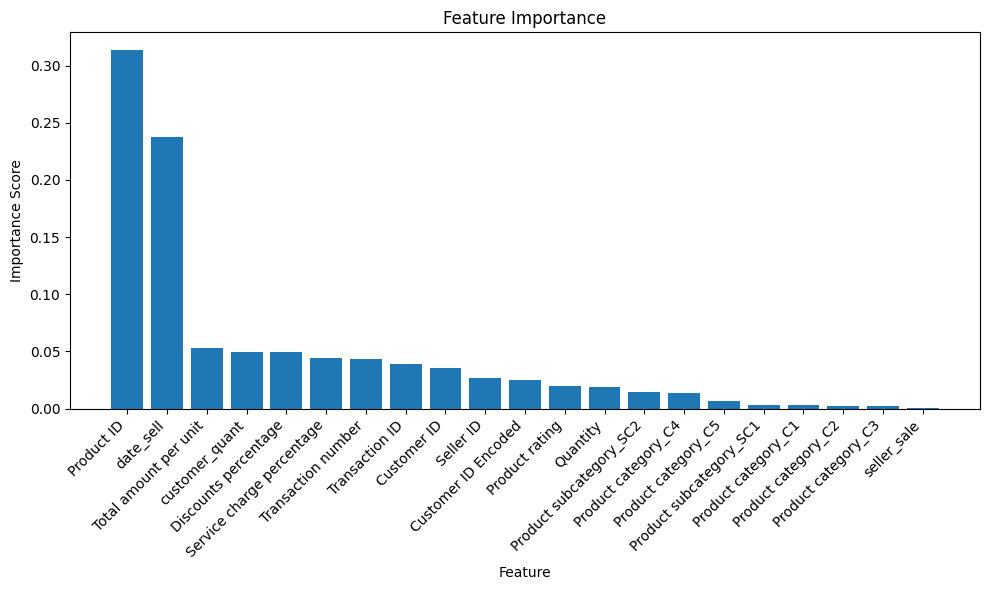

In [591]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming x_train, y_train are your training features and target
# Assuming feature_names is a list containing the names of your features

# Define feature names

feature_names = df.columns.tolist()
 # Replace [...] with your actual feature names

# Initialize and fit the RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Pair feature names with their importances
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort feature importance pairs by importance score
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [pair[0] for pair in feature_importance_pairs]
sorted_feature_importances = [pair[1] for pair in feature_importance_pairs]

# Plot sorted feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.xticks(ticks=np.arange(len(sorted_feature_importances)), labels=sorted_feature_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()
